<a href="https://colab.research.google.com/github/buddhazhou/python_study/blob/main/BackTest_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The ticker name is : 510210.SS
<format 2000-01-01> The start date  is : 
<format 2000-01-01> The end date is :  
print all data for this ticker :  y/n : 
No start date input,use default date 2024-07-01
No end date input,use today

LSI Buy date: 2024-07-07 00:00:00+08:00
LIS buy price : 0.7229999899864197

LSI 股数/买入价 : 13831.258836100167/0.7229999899864197

510210.SS initial_investment is : 10000
510210.SS LSI Portfolio Value: 10179.806523155497
510210.SS LSI Portfolio earning: 179.80652315549742, the earning % is 1.80%
[100]
[138.31258836100167]
On 2024-07-07 00:00:00+08:00, DCA investment increased to $100
[100, 200]
[138.31258836100167, 274.92461146480446]
On 2024-07-14 00:00:00+08:00, DCA investment increased to $200
[100, 200, 300]
[138.31258836100167, 274.92461146480446, 410.7941764181156]
On 2024-07-21 00:00:00+08:00, DCA investment increased to $300

Current price : 0.7360000014305115
510210.SS total_dca_investment, number of week : 3
510210.SS Total_dca_investment : 300
510210.

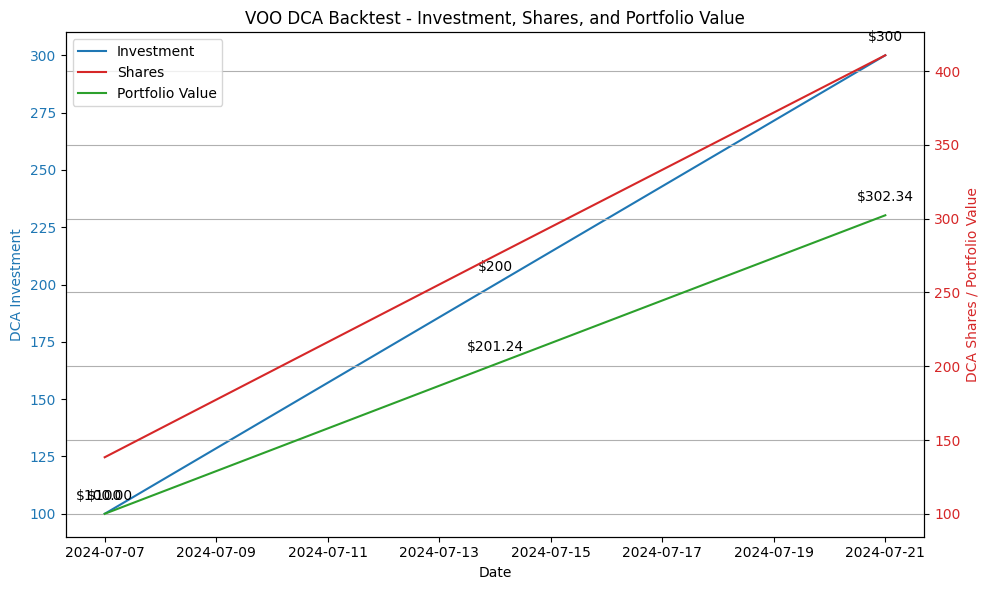

(Date
 2024-07-07 00:00:00+08:00    100
 2024-07-14 00:00:00+08:00    200
 2024-07-21 00:00:00+08:00    300
 Freq: W-SUN, dtype: int64,
 Date
 2024-07-07 00:00:00+08:00    138.312588
 2024-07-14 00:00:00+08:00    274.924611
 2024-07-21 00:00:00+08:00    410.794176
 Freq: W-SUN, dtype: float64)

In [ ]:
# from posixpath import join
import pandas as pd
import yfinance as yf
import os
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


# variable to store today's date
today = date.today()

def ticker_info_collection():
    global ticker_name
    ticker_name = input("The ticker name is : ")
    the_ticker = create_ticker_instance(ticker_name) # Assign the return value of the function to a variable

    # Collect backtest period: start date and end date

    start_date = input("<format 2000-01-01> The start date  is : ")
    end_date = input("<format 2000-01-01> The end date is :  ")
    print_all = input("print all data for this ticker :  y/n : ")


    if start_date == "":
        print("No start date input,use default date 2024-07-01")
        start_date = "2024-07-01"


    if end_date == "":
        print("No end date input,use today")
        end_date = datetime.now().strftime('%Y-%m-%d')

    ticker_hist = the_ticker.history(start=start_date,end=end_date) # Now you can use the_ticker here
    # index the data by column 'Date'
    """inplace=True: This argument indicates that the change should be made directly to the existing spy_data DataFrame,
      rather than creating a copy of it. Without inplace=True,
  you would need to assign the result back to spy_data like this: spy_data = spy_data.set_index('Date').
    """

    # Reset the index to create a 'Date' column
    ticker_hist.reset_index(inplace=True)

    # Now you can set 'Date' as index
    ticker_hist.set_index('Date', inplace=True)


    if print_all == "y" or print_all =="":
        print_ticker_hist(ticker_hist)

    return ticker_hist

def create_ticker_instance(ticker):
    get_ticker = yf.Ticker(ticker)
    #print(the_ticker)
    return get_ticker
    # return yf.Ticker(ticker)
    # variable to store today's date


    #print(the_ticker)
    # end_date = datetime.now().strftime('%Y-%m-%d')
    # ticker_hist = the_ticker.history(start='2022-01-01',end=end_date)
    #print(ticker_hist)


def print_ticker_hist(ticker_hist):
    # Set options to show all data
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    #print(ticker_hist)


    # Reset options to default (optional)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

def retreive_divdendss(ticker_hist):
    dividend_rows = ticker_hist[np.isclose(ticker_hist['Dividends'], 0) == False]
    #print(dividend_rows)
    total_dividends = dividend_rows['Dividends'].sum()
    #print(total_dividends)

def resample_data(ticker_hist,type='W'):
    # 提取每周数据（假设每周投资一次）,经过这个操作每周最后一行数据被resample到周日
    #weekly_data = spy_data.resample('W').first()
    resample_data = ticker_hist.resample(type).last()
    #print(resample_data)
    return resample_data
    # print(weekly_data)

def process_nan(raw_data):
    #处理nan值
    #weekly_data = weekly_data.fillna(method='ffill')
    after_nan_processing = raw_data.dropna()
    return after_nan_processing
    """
     weekly_data.fillna(method='ffill')

    This line uses the fillna method on the weekly_data DataFrame.
    fillna is used to fill missing values (NaN) in the DataFrame.
    The argument method='ffill' specifies the method used for filling.
    ffill stands for "forward fill". This means it replaces missing values with the value from the previous valid entry in the same column.
    """
    """
     weekly_data = weekly_data.dropna()

    This line uses the dropna method on the weekly_data DataFrame after filling the missing values.
    dropna permanently removes rows or columns containing missing values (NaN) from the DataFrame.
    By default, it removes rows with any missing value.
    """

def backtest_lsi(final_dataset):

    # 定义策略参数 initial_investment 只和一次性投入有关
    #initial_investment = 10000
    initial_investment = 10000
    #weekly_investment = 2500
    weekly_investment = 500

    # 这个值是用于计算LSI买入值, LSI 选取start date的收盘价
    # 初始化变量
    dca_investment = 0
    va_investment = 0
    dca_shares = 0
    va_shares = 0
    lsi_shares = 0
    i = 0
    j = 0
    # Lump Sum Investment


    # 这个值是用于计算LSI买入值, LSI 选取start date的收盘价

    """
    ticker_hist: This is your DataFrame that presumably contains historical stock data, including columns like 'Open', 'High', 'Low', 'Close', 'Volume', etc.
    .iloc[]: This is an attribute used for integer-location based indexing in Pandas DataFrames. It allows you to access rows and columns by their numerical position.
    0: This indicates you want to access the row at index position 0, which is the first row of the DataFrame.
    ['Close']: This part selects the 'Close' column from the row you've selected.
    In essence, the entire expression retrieves the value in the 'Close' column of the first row of your ticker_hist DataFrame, giving you the closing price for the earliest trading day in your data.
    """
    print(f"\nLSI Buy date: {final_dataset.index[0]}")
    print(f"LIS buy price : {final_dataset.iloc[0]['Close']}")
    lsi_shares = initial_investment / final_dataset.iloc[0]['Close']
    print(f"\nLSI 股数/买入价 : {lsi_shares}/{final_dataset.iloc[0]['Close']}")
    # 计算组合价值
    final_price = final_dataset.iloc[-1]['Close']
    lsi_portfolio_value = lsi_shares * final_price
    print(f"\n{ticker_name} initial_investment is : {initial_investment}")
    print(f"{ticker_name} LSI Portfolio Value: {lsi_portfolio_value}")
    print(f"{ticker_name} LSI Portfolio earning: {lsi_portfolio_value-initial_investment}, the earning % is {(lsi_portfolio_value-initial_investment)/initial_investment:.2%}")

def backtest_dca(final_dataset,weekly_investment=100):


    # 定义策略参数 initial_investment 只和一次性投入有关
    #initial_investment = 10000
    initial_investment = 10000
    #weekly_investment = 2500
    #weekly_investment = 500

    # 初始化变量
    dca_investment = 0
    va_investment = 0
    dca_shares = 0
    va_shares = 0
    lsi_shares = 0
    i = 0
    j = 0

    # Create empty lists to store investment and shares over time
    dca_investment_history = []
    dca_shares_history = []

    # 模拟DCA策略
    for date, row in final_dataset.iterrows():
        i += 1
    #    print(f"date : {date}")
    #    print(f"The Week {i} Close price : {row['Close']}")
    #    print(f"The week {i}_dca_shares_investment : {weekly_investment / row['Close']}")
        dca_shares += weekly_investment / row['Close']
    #    print(f"The total dca_shares after week {i}: {dca_shares}")
        dca_investment += weekly_investment
    #    print(f"The total dca_investment after week {i}: {dca_investment}")

        # Append current investment and shares to history
        dca_investment_history.append(dca_investment)
        dca_shares_history.append(dca_shares)
        print(dca_investment_history)
        print(dca_shares_history)

        # Highlight the date when DCA investment increases
        print(f"On {date}, DCA investment increased to ${dca_investment}")


    # 计算组合价值
    final_price = final_dataset.iloc[-1]['Close']
    dca_portfolio_value = dca_shares * final_price
    print(f"\nCurrent price : {final_price}")
    print(f"{ticker_name} total_dca_investment, number of week : {i}")
    print(f"{ticker_name} Total_dca_investment : {dca_investment}")
    print(f"{ticker_name} DCA Portfolio Value: {dca_portfolio_value}")
    print(f"{ticker_name} DCA Portfolio earning: {dca_portfolio_value-dca_investment}, the earning % is : {(dca_portfolio_value-dca_investment)/dca_investment:.2%} ,the annual interest : is {(dca_portfolio_value-dca_investment)/dca_investment/i*52:.2%}")

    # Convert the lists to Pandas Series with dates as index
    dca_investment_series = pd.Series(dca_investment_history, index=final_dataset.index)
    dca_shares_series = pd.Series(dca_shares_history, index=final_dataset.index)

    # Calculate portfolio value for each date
    dca_portfolio_value_history = (dca_shares_series * final_dataset['Close'])

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # DCA Investment (left y-axis)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('DCA Investment', color=color)
    ax1.plot(dca_investment_series.index, dca_investment_series.values, color=color, label='Investment')
    ax1.tick_params(axis='y', labelcolor=color)

    # Highlight investment values on the plot
    for date, value in dca_investment_series.items():
        ax1.annotate(f"${value}", (date, value), textcoords="offset points", xytext=(0,10), ha='center')

    # DCA Shares (right y-axis)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('DCA Shares / Portfolio Value', color=color)
    ax2.plot(dca_shares_series.index, dca_shares_series.values, color='tab:red', label='Shares')
    ax2.plot(dca_portfolio_value_history.index, dca_portfolio_value_history.values, color='tab:green', label='Portfolio Value')
    ax2.tick_params(axis='y', labelcolor=color)

    # Highlight portfolio values on the plot
    for date, value in dca_portfolio_value_history.items():
        ax2.annotate(f"${value:.2f}", (date, value), textcoords="offset points", xytext=(0,10), ha='center')

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.title('VOO DCA Backtest - Investment, Shares, and Portfolio Value')
    plt.grid(True)
    fig.tight_layout()
    plt.show()




    return dca_investment_series, dca_shares_series # Return the series instead of single values



ticker_dataset = ticker_info_collection()
#print_ticker_hist(ticker_dataset)
retreive_divdendss(ticker_dataset)
resample_dataset = resample_data(ticker_dataset)
processed_dataset = process_nan(resample_dataset)
backtest_lsi(processed_dataset)
backtest_dca(processed_dataset,weekly_investment=100)



# ... (rest of your code) ...








NameError: name 'dca_shares_series' is not defined